# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
print(data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [11]:
tf.keras.utils.image_dataset_from_directory?

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory,
labels='inferred')` will return a `tf.data.Dataset` that yields batches of
images from the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: `.jpeg`, `.jpg`, `.png`, `.bmp`, `.gif`.
Animated gifs are truncated

In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
print(data_iterator)

In [14]:
batch = data_iterator.next()

In [15]:
print(batch)

(array([[[[210.7985   , 228.54263  , 240.03091  ],
         [244.50897  , 246.43085  , 249.63397  ],
         [255.       , 253.       , 239.71027  ],
         ...,
         [101.46289  ,  87.46289  ,  87.46289  ],
         [ 92.233    ,  80.233    ,  84.233    ],
         [ 88.453125 ,  76.453125 ,  80.453125 ]],

        [[235.6883   , 241.05548  , 247.55353  ],
         [242.54318  , 245.67273  , 252.93402  ],
         [249.47562  , 252.62506  , 245.93259  ],
         ...,
         [ 99.265625 ,  85.157196 ,  85.48248  ],
         [ 94.53516  ,  81.31055  ,  84.90234  ],
         [ 89.17578  ,  75.95117  ,  79.54297  ]],

        [[231.99313  , 233.93292  , 240.79391  ],
         [222.13855  , 235.00378  , 252.3534   ],
         [231.65012  , 250.45285  , 254.7207   ],
         ...,
         [102.28934  ,  87.28934  ,  90.28934  ],
         [ 97.078125 ,  82.078125 ,  85.078125 ],
         [ 90.359375 ,  75.359375 ,  78.359375 ]],

        ...,

        [[ 12.158203 ,  15.158203 ,  

In [16]:
print(type(batch[0]))

<class 'numpy.ndarray'>


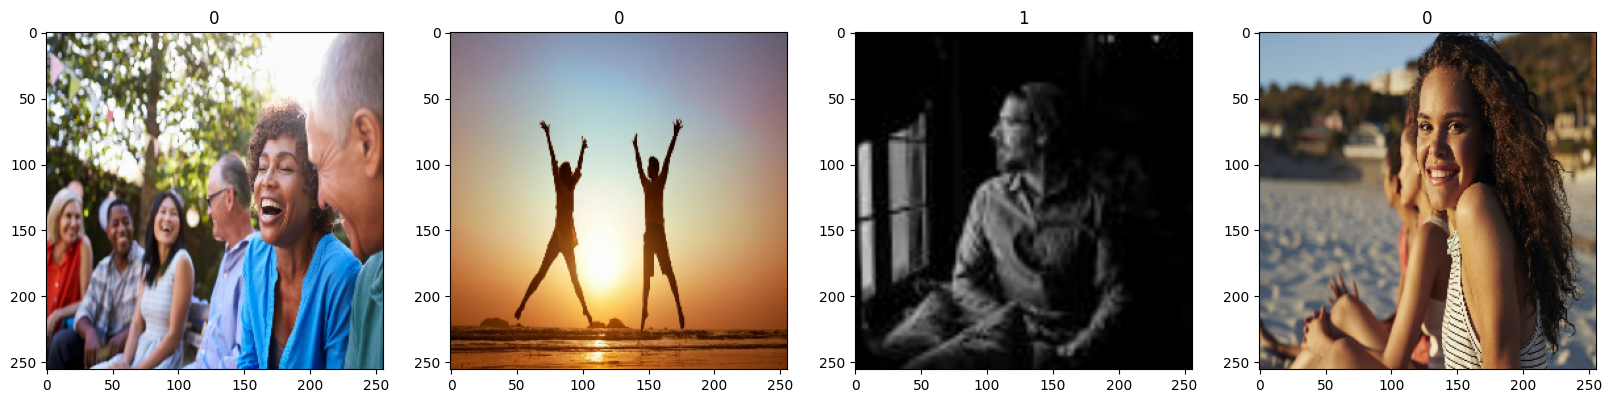

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.1799326 , 0.7448836 , 0.7682292 ],
          [0.1799326 , 0.7448836 , 0.7682292 ],
          [0.1799326 , 0.7448836 , 0.7682292 ],
          ...,
          [0.1799326 , 0.7448836 , 0.7682292 ],
          [0.1799326 , 0.7448836 , 0.7682292 ],
          [0.1799326 , 0.7448836 , 0.7682292 ]],
 
         [[0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          ...,
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335]],
 
         [[0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          ...,
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335],
          [0.05882353, 0.7058824 , 0.73333335]],
 
         ...,
 
         [[0.05882353, 0.7058824 , 0.73333335],
          [0.05882

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

7

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
print(train)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# 6. Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
MaxPooling2D?

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Docstring:     
Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width)
by taking the maximum value over an input window
(of size defined by `pool_size`) for each channel of the input.
The window is shifted by `strides` along each dimension.

The resulting output,
when using the `"valid"` padding option, has a spatial shape
(number of rows or columns) of:
`output_shape = math.floor((input_shape - pool_size) / strides) + 1`
(when `input_shape >= pool_size`)

The resulting output shape when using the `"same"` padding option is:
`output_shape = math.floor((input_shape - 1) / strides) + 1`

For example, for `strides=(1, 1)` and `padding="valid"`:

>>> x = tf.constant([[1., 2., 3.],
...                  [4., 5., 6.],
...                  [7., 8., 9.]])
>>> x = tf.reshape(x, [1, 3, 3, 1])
>>> max_pool_2d = t

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 22s 2s/step - loss: 1.0848 - accuracy: 0.4866 - val_loss: 0.6557 - val_accuracy: 0.6094
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.6766 - accuracy: 0.5268 - val_loss: 0.6508 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.6117 - accuracy: 0.6473 - val_loss: 0.5279 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 18s 2s/step - loss: 0.5688 - accuracy: 0.7634 - val_loss: 0.5489 - val_accuracy: 0.7812
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.4621 - accuracy: 0.8661 - val_loss: 0.3114 - val_accuracy: 0.9844
Epoch 6/20
7/7 [==============================] - 16s 2s/step - loss: 0.3294 - accuracy: 0.9018 - val_loss: 0.1959 - val_accuracy: 0.9531
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.2251 - accuracy: 0.9062 - val_loss: 0.2621 - val_accuracy: 0.8750
Epoch 8/20
7/7 [================

# 8. Plot Performance

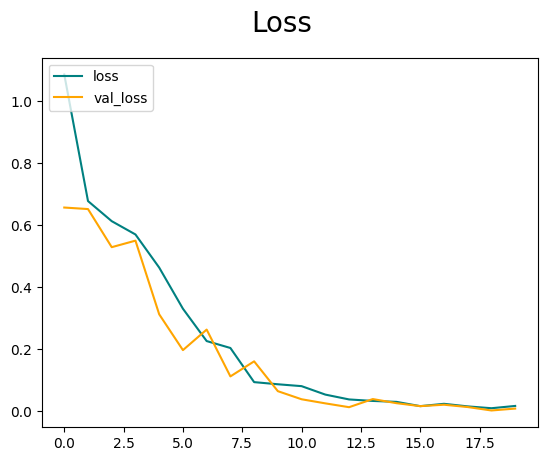

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

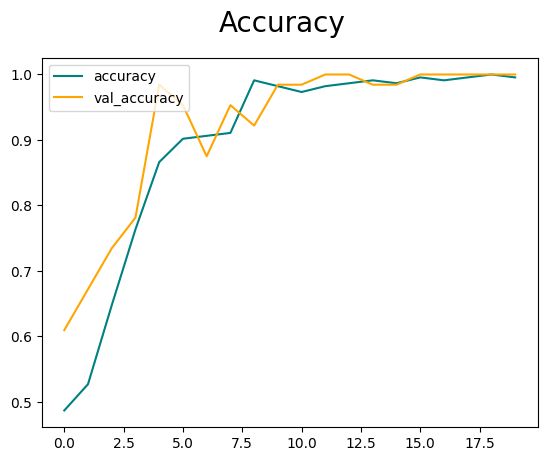

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 295ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

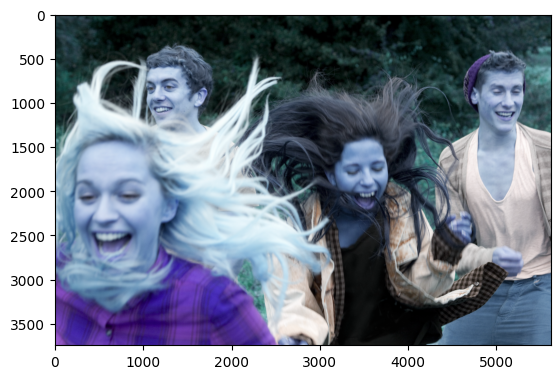

In [41]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [42]:
print(img.shape)

(3744, 5616, 3)


In [43]:
print(img)

[[[ 12  29  32]
  [ 10  29  32]
  [  9  28  31]
  ...
  [  1  23  18]
  [  3  24  21]
  [  3  21  20]]

 [[ 19  31  35]
  [ 15  30  33]
  [ 18  35  38]
  ...
  [  0  23  18]
  [ 10  24  22]
  [  0  21  18]]

 [[ 17  32  35]
  [ 15  27  31]
  [ 22  37  40]
  ...
  [  3  17  13]
  [  1  20  17]
  [  3  22  19]]

 ...

 [[155  99 212]
  [152  90 210]
  [159 101 209]
  ...
  [ 82 114 149]
  [ 88 121 154]
  [ 96 129 162]]

 [[157 102 211]
  [151  90 210]
  [159 100 212]
  ...
  [ 85 120 153]
  [ 89 123 153]
  [ 92 126 156]]

 [[158 100 209]
  [148  90 208]
  [153  97 210]
  ...
  [ 82 116 152]
  [ 82 116 152]
  [ 86 118 153]]]


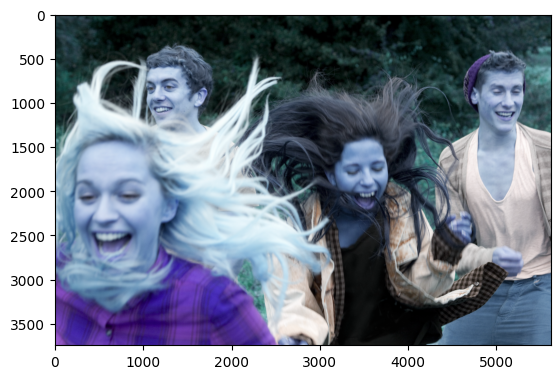

In [44]:
plt.imshow(img)

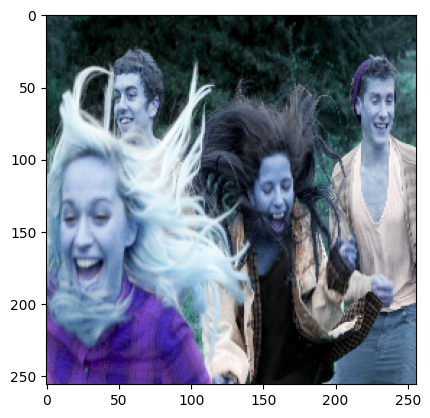

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


In [47]:
yhat

array([[0.2493911]], dtype=float32)

In [48]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\84325\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [51]:
new_model = load_model('models\imageclassifier.h5')

In [52]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 414ms/step


array([[0.2493911]], dtype=float32)